# Plot of MSE vs training set of different size and fixed testing set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [2]:
df = pd.read_csv("C:\\Users\\HP\\Documents\\Statistical Machine Learning\\archive\\auto-mpg.csv")
df.head() # to view the 1st 5 rows

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
# dropping the rows with "?"
df1 = df.drop(df[df.values == '?'].index)

In [4]:
# changing the datatype of th column to float from string
df1['horsepower'] = df1['horsepower'].astype(float)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [6]:
# to get the intercept term in the model, we add one extra column of 1's.
df_n = sm.add_constant(df1)
df_n

,const,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,1.0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,1.0,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,1.0,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,1.0,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,1.0,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...,...
393,1.0,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,1.0,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,1.0,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,1.0,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [7]:
train_df, test_df = train_test_split(df_n, test_size = 0.3, random_state = 0)

In [9]:
train_df.shape

(274, 10)

In [10]:
train_df.head()

,const,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
397,1.0,31.0,4,119.0,82.0,2720,19.4,82,1,chevy s-10
160,1.0,17.0,6,231.0,110.0,3907,21.0,75,1,buick century
143,1.0,26.0,4,97.0,78.0,2300,14.5,74,2,opel manta
346,1.0,32.3,4,97.0,67.0,2065,17.8,81,3,subaru
67,1.0,11.0,8,429.0,208.0,4633,11.0,72,1,mercury marquis


In [11]:
test_df.shape

(118, 10)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
slr = LinearRegression()

In [22]:
mse_train1 = []
mse_test1 = []
r2_score1 = []
r2_score2 = []
x_test = test_df.loc[:, ["const", "horsepower"]]
y_test = test_df.loc[:, ["mpg"]]
size = [5, 10, 50, 100, 150, 200, 250, 300, 350] # we take different training sizes

for i in size:
    sample1 = train_df.sample(i, replace = True, random_state=0)
    X1 = sample1.loc[:, ["const", "horsepower"]]
    y1 = sample1.loc[:, ["mpg"]]
    slr.fit(X1, y1)
    y_train_pred = slr.predict(X1)
    y_test_pred = slr.predict(x_test)
    mse_train1.append(mean_squared_error(y1, y_train_pred))
    mse_test1.append(mean_squared_error(y_test, y_test_pred))
    r2_score1.append(metrics.r2_score(y1, y_train_pred))
    r2_score2.append(metrics.r2_score(y_test, y_test_pred))

Text(0.5, 1.0, 'Plot of Mean Squared Error for training sets of different sizes and fixed test set')

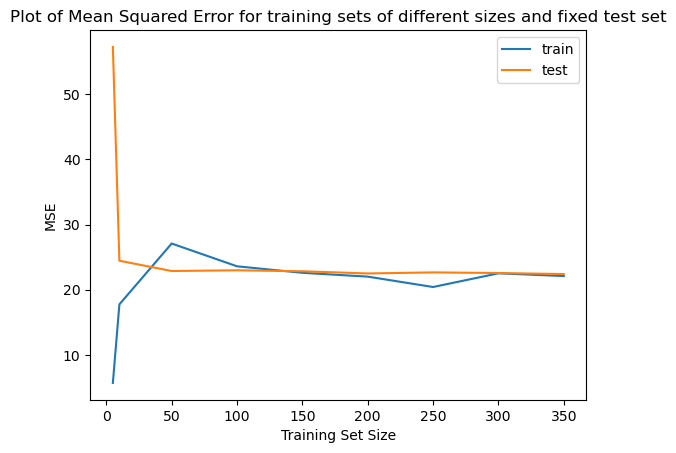

In [23]:
plt.plot(size, mse_train1, label = "train")
plt.plot(size, mse_test1, label = "test")
plt.legend()
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.title("Plot of Mean Squared Error for training sets of different sizes and fixed test set")

* Here when the training size is 1 then the model perfectly fits the data, making the training error very less. In that case the testing error is very large as the model is built around a single instance, and it almost certainly won't be able to generalize accurately on data that hasn't seen before.

* As we increase the training set size, the model cannot fit perfectly anymore the training set. So the training error gradually increases. However, the model is trained on more data, so it manages to fit better the testing set. Thus, the testing error gradually decreases. 

Text(0.5, 1.0, 'Plot of r2_score for training sets of different sizes and fixed test set')

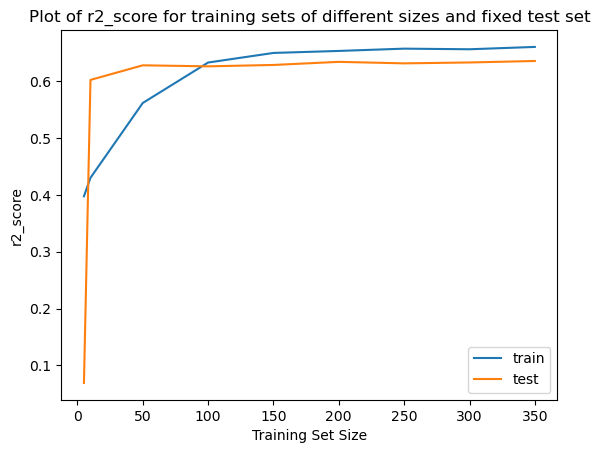

In [24]:
plt.plot(size, r2_score1, label = "train")
plt.plot(size, r2_score2, label = "test")
plt.legend()
plt.xlabel("Training Set Size")
plt.ylabel("r2_score")
plt.title("Plot of r2_score for training sets of different sizes and fixed test set")